<a href="https://colab.research.google.com/github/CarmenRaposo/06MAIR-Aprendizaje-No-Supervisado-Trabajo-Final/blob/master/Trabajo%20Final/Trabajo_Final_Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte inicial genérica:

In [0]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

(150, 4)


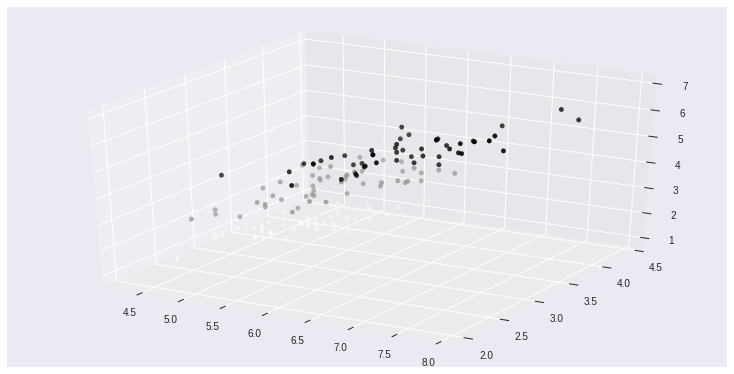

In [8]:
iris = datasets.load_iris()
Dx = iris.data[:, :3]  # we only take the first three features.
Dy = iris.target
print(iris.data.shape)

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)

# Algoritmos Jerárquicos
## Algoritmo Jerárquico aglomerativo

Usamos las funciones disponibles en las distintas librerias de Python

In [0]:
#Importamos librerias necesarias para los algoritmos aglomerativos
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, cut_tree
# Importamos la libreria para el método dendrogram de scipy
from scipy.cluster.hierarchy import dendrogram



#Con el paámetro linkage podemos controlar los criterios usados. 
#Probaremos 3 criterios: disimilitud mínima : 'single'; máxima: 'complete'; y media: 'average'

#Dx viene definido al inicio del notebook y es comun para los 3 bloques.

modelo = AgglomerativeClustering(linkage="ward")
modelo = modelo.fit(Dx)

modelo = AgglomerativeClustering(linkage="complete")
modelo = modelo.fit(Dx)

modelo = AgglomerativeClustering(linkage="average")
modelo = modelo.fit(Dx)

{'color_list': ['g',
  'b',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b',
  'm',
  'm',
  'y',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'b',
  'b',
  'b',
  'b',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'b',
  'b',
  'b',
  'b',
  'c',
  'm',
  'm',
  'y',
  'y',
  'k',
  'b',
  'b',
  'b',
  'b',
  'b',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'c',
  'm',
  'm',
  'b',
  'b',
  'b',
  'b',
  'b',
  'y',
  'y',
  'y',
  'y',
  'b',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'b',
  'b',
  'b',
  'c',
  'c',
  'c',
  'c',
  'b',
  'm',
  'm',
  'y',
  'k',
  'k',
  'k',
  'k',
  'b',
  'b',
  'b',
  'b',
  'b',
  'g',
  'g',
  'b',
  'r',
  'b',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'm',
  'm',
  'm',
  'b',
  'y',
  'k',
  'k',
  'k',
  'k',
  'b',

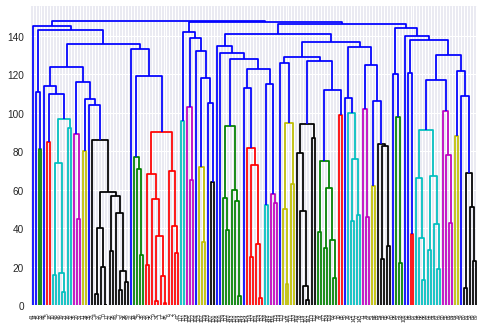

In [16]:
# Creamos la matriz de enlaces que necesita el método dendrogram de scipy
uniones = modelo.children_
# Las distancias y los tamaños, en esta ocasión, los asignamos de manera 
# inocua para no alterar el resultado (no disponemos de la información completa)
distancias = np.arange(uniones.shape[0])
tamanyos = np.arange(2, uniones.shape[0]+2)
mEnlaces = np.column_stack([uniones, distancias, tamanyos]).astype(float)

dendrogram(mEnlaces)

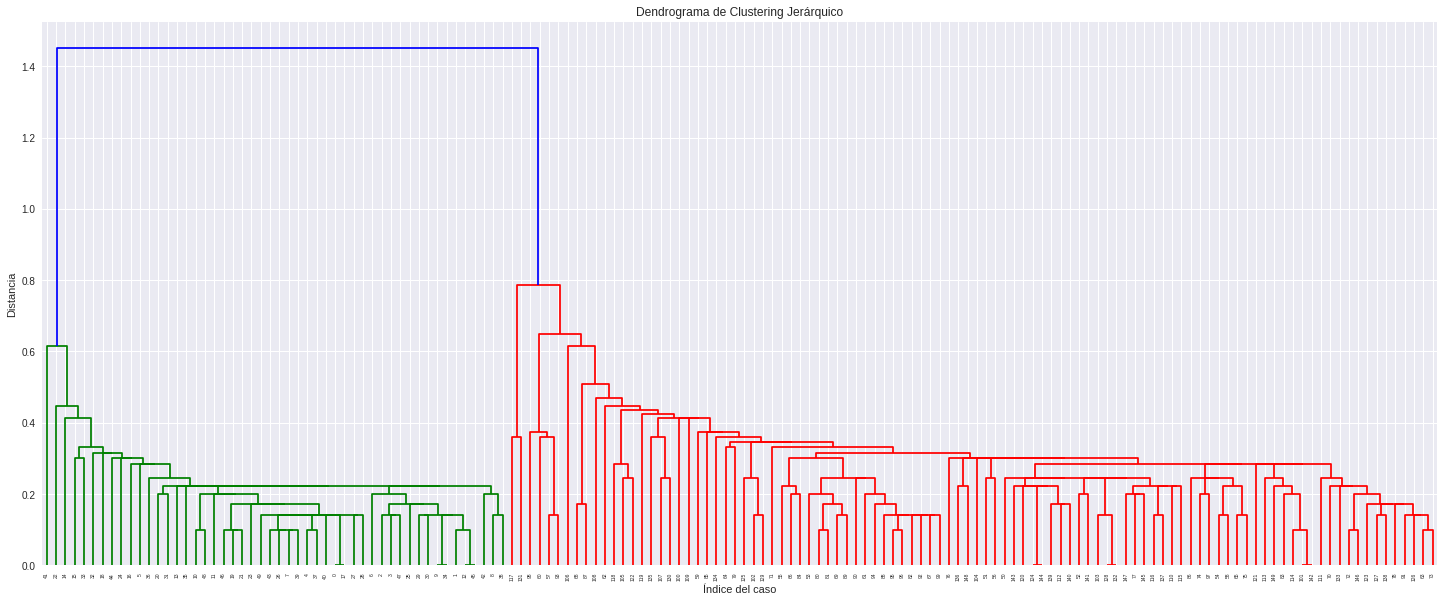

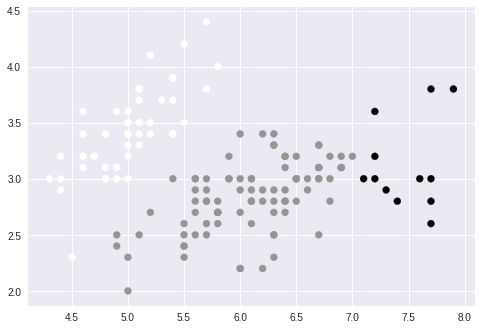

In [19]:
plt.scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters=3).flatten())
plt.show()

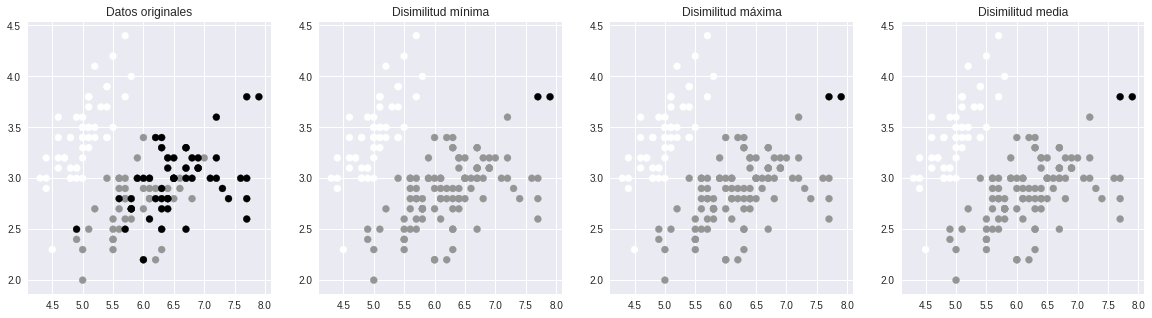

<Figure size 1800x720 with 0 Axes>

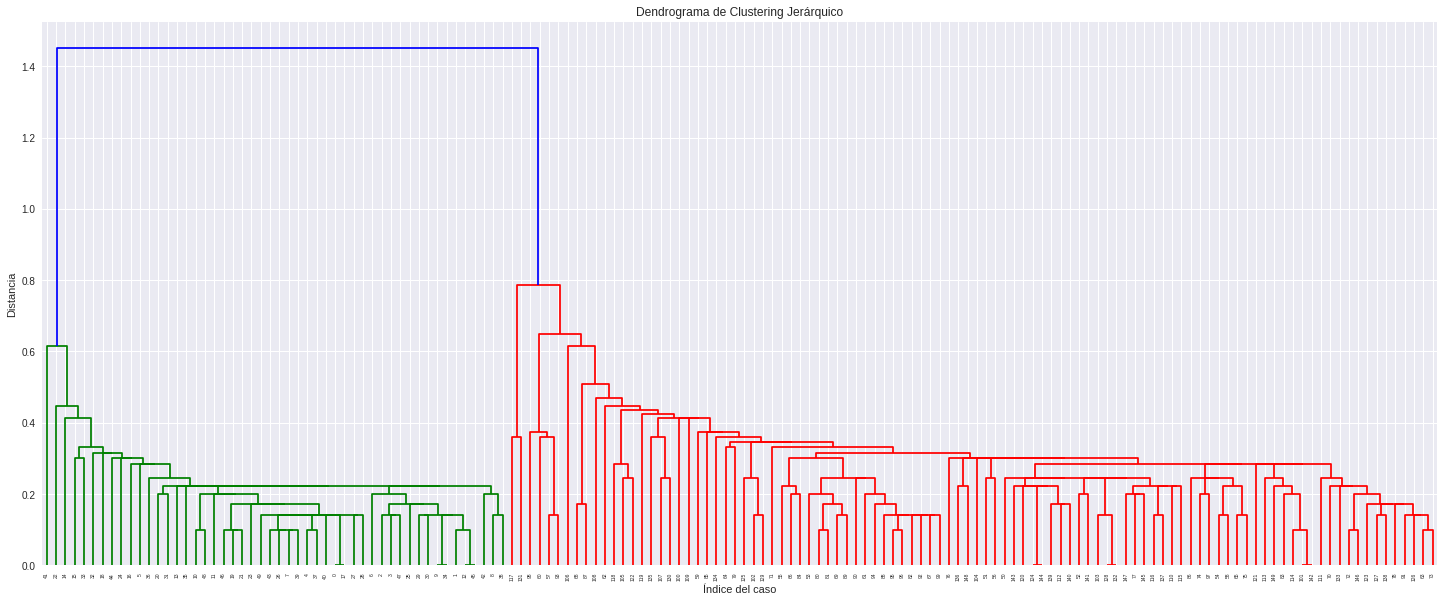

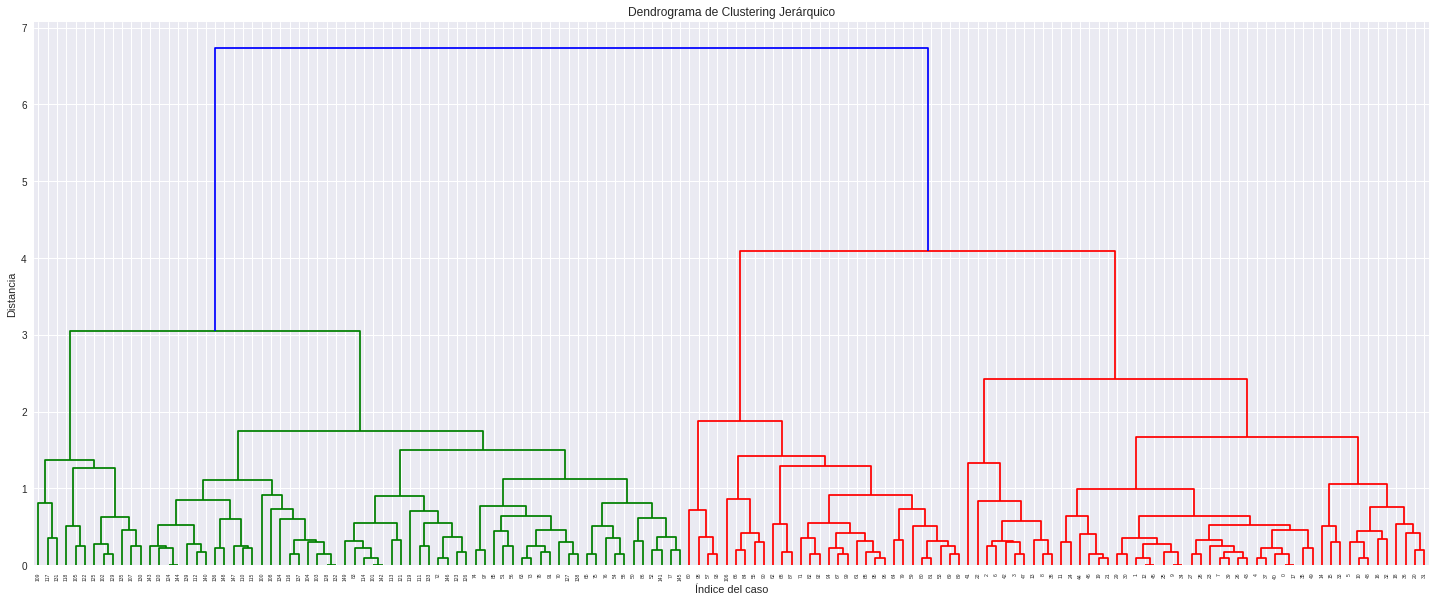

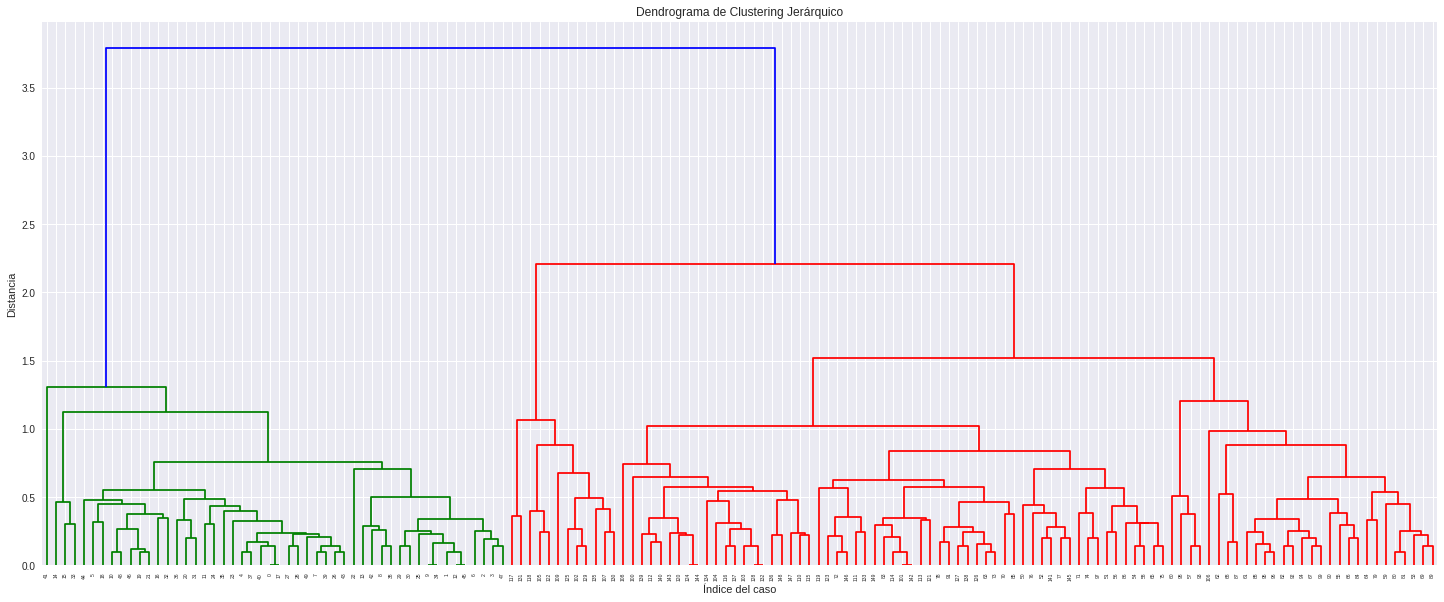

In [38]:
def plot_cluster(Dx,Dy,K):
    fig, ax = plt.subplots(1,4, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1], c=Dy)
    ax[0].set_title('Datos originales')
    plt.figure(figsize=(25, 10))
    
   

    modelo1 = linkage(Dx, 'single')
    ax[1].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[1].set_title('Disimilitud mínima')
    
    
    
    modelo2 = linkage(Dx, 'complete')
    ax[2].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[2].set_title('Disimilitud máxima')
    
    modelo3 = linkage(Dx, 'average')
    ax[3].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[3].set_title('Disimilitud media')
    
    return modelo1, modelo2, modelo3
    
def plot_den(modelo):
  plt.figure(figsize=(25, 10))
  plt.title('Dendrograma de Clustering Jerárquico')
  plt.xlabel('Índice del caso')
  plt.ylabel('Distancia')
  dendrogram(modelo)
  plt.show()  
  

  
modelos=plot_varios(Dx,Dy,3)

for x in range(len(modelos)):
    plot_den(modelos[x])